In [1]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline
import pandas as pd
from matplotlib import cm

In [2]:
# sayat's method
#
def dist(v1,v2):
    dist = distance.euclidean((v1['x'],v1['y']),(v2['x'],v2['y']))
    return dist
#
#
#    node,edge = ox.graph_to_gdfs(G)
#    g = ig.Graph(directed=False)
#
#    x_coords = node['x'].tolist() 
#    y_coords = node['y'].tolist()
#    ids = node['osmid'].tolist()
#
#    for i in range(len(x_coords)):
#        g.add_vertex(x=x_coords[i],y=y_coords[i],id=ids[i])
#
#    df1 = pd.DataFrame(data=g.vs['id'],columns={'ids'})
#    df1['number'] = np.arange(0,(g.vcount()))
#
#    edges1 = pd.merge(edge,df1,left_on='u',right_on='ids')
#    edges2 = pd.merge(edges1,df1,left_on='v',right_on='ids')
#
#    edgelist = (np.stack([edges2['number_x'].tolist(),edges2['number_y'].tolist()]).T).tolist()
#
#    g.add_edges(edgelist)
#    g.simplify()
#
#    new_edges=g.get_edgelist()
#
#    weight=[]
#    for k in range(len(new_edges)):
#        d = dist(g.vs[new_edges[k][0]],g.vs[new_edges[k][1]])
#        weight.append(d)
#    g.es()['weight'] = weight
#    return g

In [3]:
def osm_to_ig(node_imported,edge_imported):
    #node,edge = ox.graph_to_gdfs(G)
    node,edge = node_imported,edge_imported
    g = ig.Graph(directed=False)

    x_coords = node['x'].tolist() 
    y_coords = node['y'].tolist()
    ids = node['osmid'].tolist()
    coords=[]

    for i in range(len(x_coords)):
        g.add_vertex(x=x_coords[i],y=y_coords[i],id=ids[i])
        coords.append((x_coords[i],y_coords[i]))

    id_dict = dict(zip(g.vs['id'],np.arange(0,g.vcount()).tolist()))
    coords_dict = dict(zip(np.arange(0,g.vcount()).tolist(),coords))


    edge_list = []
    for i in range(len(edge)):
        edge_list.append([id_dict.get(edge['u'][i]),id_dict.get(edge['v'][i])])
        
    g.add_edges(edge_list)
    g.simplify()
    new_edges=g.get_edgelist()
    
    distances_list = []
    for i in range(len(new_edges)):
        distances_list.append(distance.euclidean(coords_dict.get(new_edges[i][0]),coords_dict.get(new_edges[i][1])))

    g.es()['weight']=distances_list
    return g

In [4]:
def plotgraph(bc,numbins,color_choice):
    counts,bins = np.histogram(bc,bins=numbins,density=1)
    t = []
    for i in range(len(counts)):
        t.append((bins[i+1] + bins[i])/2)
    plt.plot(t,counts,'o',color=color_choice)
    %config InlineBackend.figure_format = 'retina'

In [5]:
#node_under30 = pd.read_csv('amsterdam_node_30.csv')
#edge_under30 = pd.read_csv('amsterdam_edge_30.csv')

#node_under30 = pd.read_csv('copenhagen_node_30.csv')
#edge_under30 = pd.read_csv('copenhagen_edge_30.csv')

node_under30 = pd.read_csv('paris_node_30.csv')
edge_under30 = pd.read_csv('paris_edge_30.csv')


g_under30 = osm_to_ig(node_under30,edge_under30)

C:\Users\perlm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#node_track = pd.read_csv('amsterdam_node_track.csv')
#edge_track = pd.read_csv('amsterdam_edge_track.csv')

#node_track = pd.read_csv('copenhagen_node_track.csv')
#edge_track = pd.read_csv('copenhagen_edge_track.csv')

node_track = pd.read_csv('paris_node_track.csv')
edge_track = pd.read_csv('paris_edge_track.csv')


g_track = osm_to_ig(node_track,edge_track)

In [7]:
#node_lane = pd.read_csv('amsterdam_node_lane.csv')
#edge_lane = pd.read_csv('amsterdam_edge_lane.csv')

#node_lane = pd.read_csv('copenhagen_node_lane.csv')
#edge_lane = pd.read_csv('copenhagen_edge_lane.csv')

node_lane = pd.read_csv('paris_node_lane.csv')
edge_lane = pd.read_csv('paris_edge_lane.csv')


g_lane = osm_to_ig(node_lane,edge_lane)

In [8]:
#node_allbike = pd.read_csv('amsterdam_node_allbike.csv')
#edge_allbike = pd.read_csv('amsterdam_edge_allbike.csv')

#node_allbike = pd.read_csv('copenhagen_node_allbike.csv')
#edge_allbike = pd.read_csv('copenhagen_edge_allbike.csv')

node_allbike = pd.read_csv('paris_node_allbike.csv')
edge_allbike = pd.read_csv('paris_edge_allbike.csv')


g_allbike = osm_to_ig(node_allbike,edge_allbike)

C:\Users\perlm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


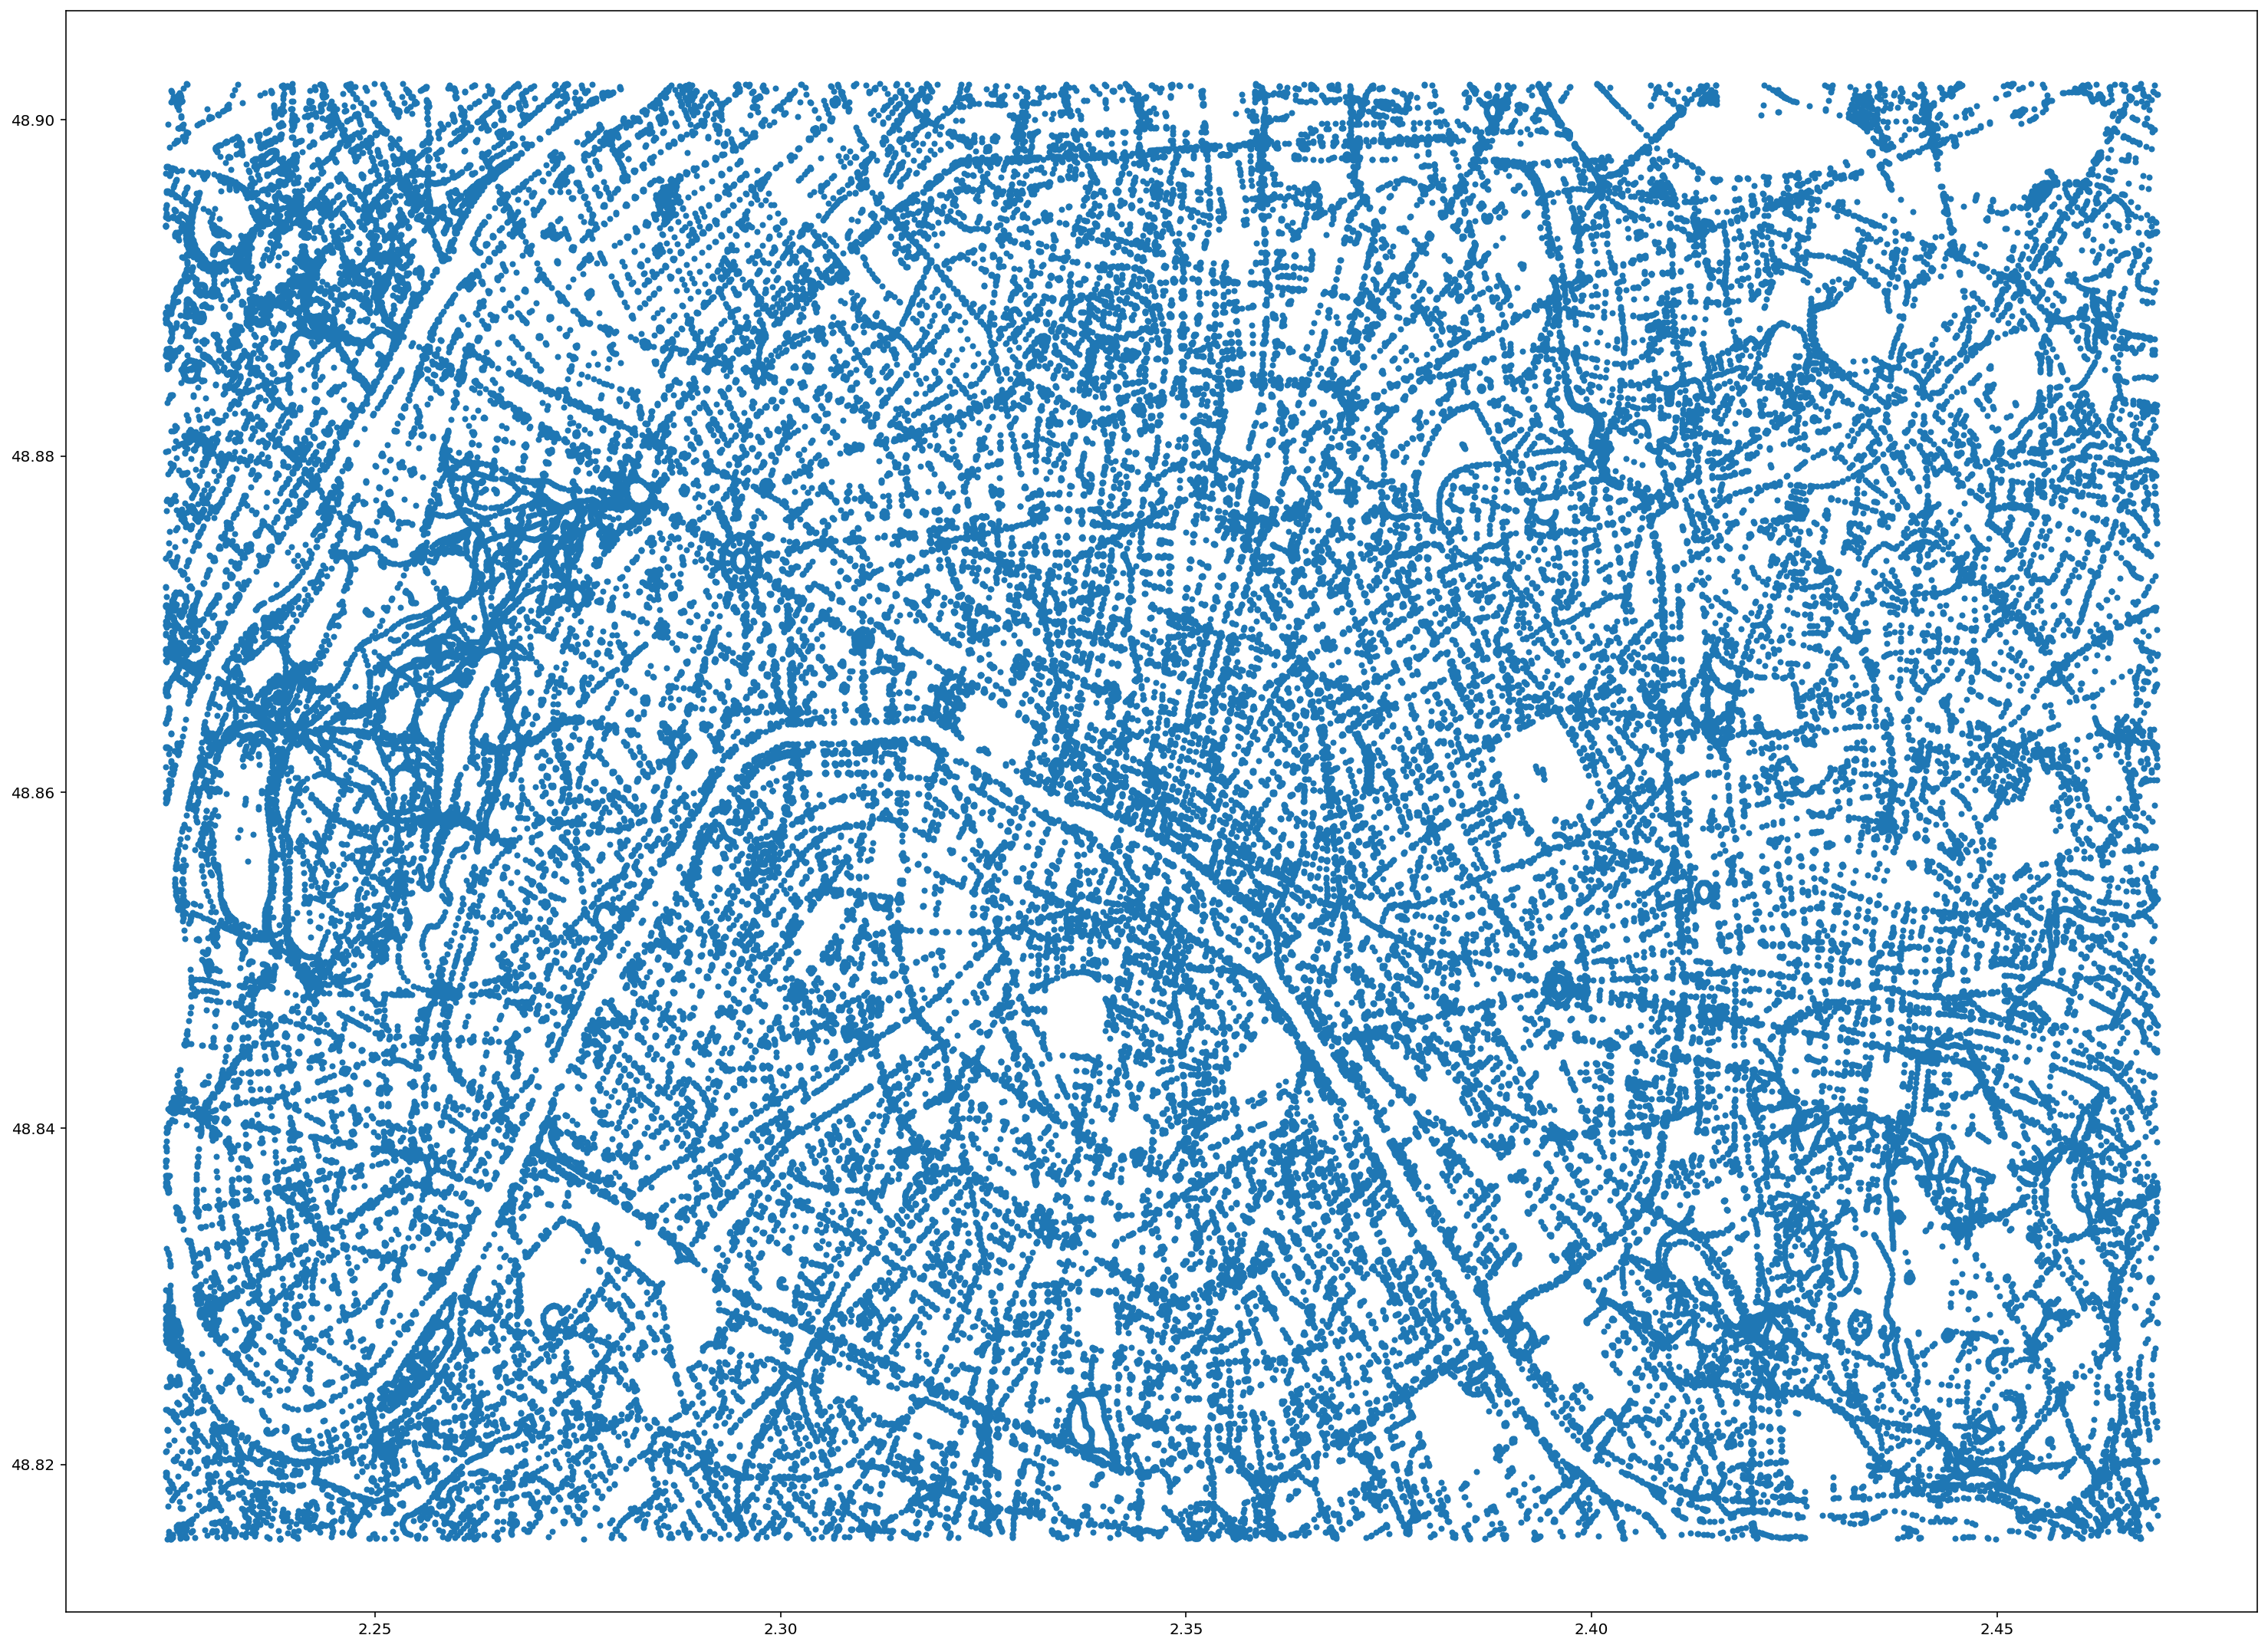

In [9]:
plt.figure(figsize=[4*6.4,4*4.8])
plt.plot(g_allbike.vs['x'],g_allbike.vs['y'],'.')
%config InlineBackend.figure_format = 'retina'

In [10]:
g_biggest = g_allbike.subgraph(list(g_allbike.components())[0])

In [11]:
g_biggest.summary()

'IGRAPH U-W- 125892 142388 -- \n+ attr: id (v), x (v), y (v), weight (e)'

In [12]:
id_dict = dict(zip(g_biggest.vs['id'],np.arange(0,g_biggest.vcount()).tolist()))
subnetwork_id = np.unique(g_track.vs['id'] + g_lane.vs['id'] + g_under30.vs['id'])
G_agg = g_biggest.subgraph([id_dict.get(i) for i in subnetwork_id])
#subgraph of biggest cluster containing all tracks, lanes, or roads under 30kmph

In [13]:
G_agg.summary()

'IGRAPH U-W- 33304 34410 -- \n+ attr: id (v), x (v), y (v), weight (e)'

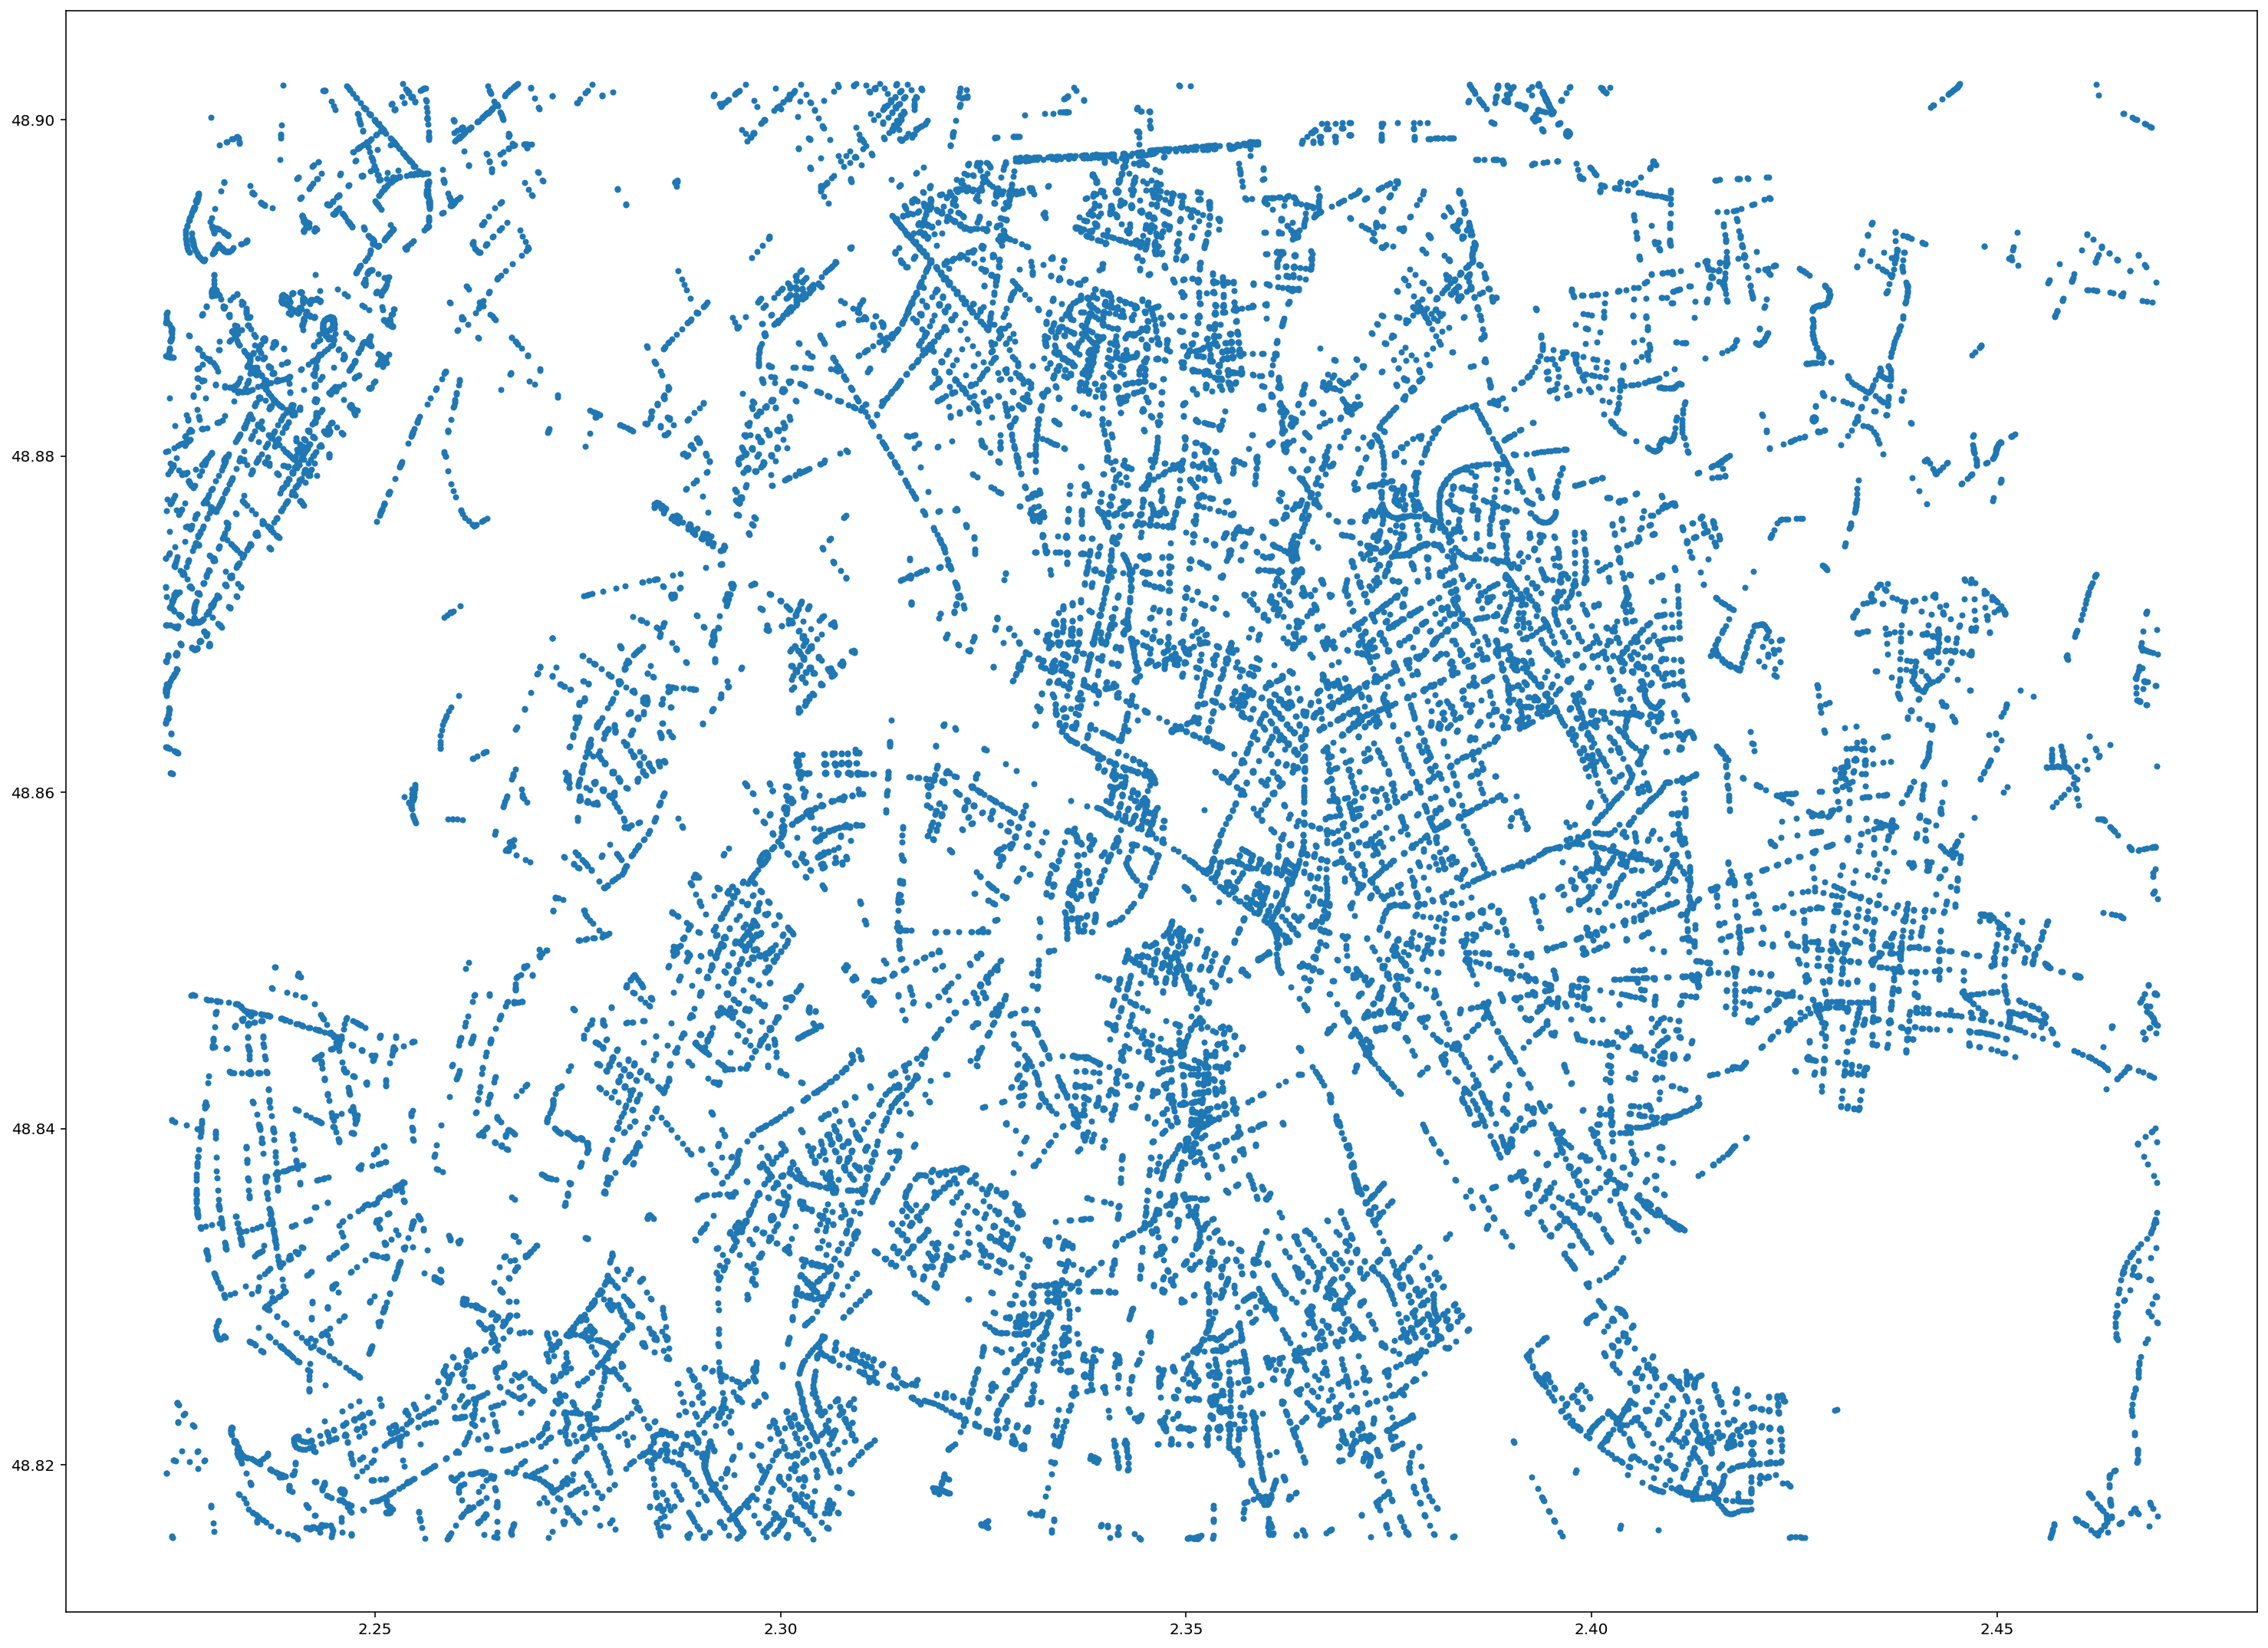

In [14]:
plt.figure(figsize=[4*6.4,4*4.8])
plt.plot(G_agg.vs['x'],G_agg.vs['y'],'.')
%config InlineBackend.figure_format = 'retina'

In [15]:
clusters = []
cluster_sizes = []
index = []
for i in range(len(list(G_agg.components()))):
    #if (G_agg.subgraph(list(G_agg.components())[i]).vcount() > 200) :
    if len(list(G_agg.components())[i]) > 200:
        index.append(i)
        cluster_sizes.append(G_agg.subgraph(list(G_agg.components())[i]).vcount())
        clusters.append(G_agg.subgraph(list(G_agg.components())[i]))

In [16]:
clusters[3].summary()

'IGRAPH U-W- 1706 1828 -- \n+ attr: id (v), x (v), y (v), weight (e)'

In [17]:
num_clusters = len(clusters)
num_clusters

26

In [18]:
cluster_indices = sorted(range(len(cluster_sizes)),key=lambda k: cluster_sizes[k],reverse=True)

In [19]:
clusters[cluster_indices[0]].summary()

'IGRAPH U-W- 7961 8448 -- \n+ attr: id (v), x (v), y (v), weight (e)'

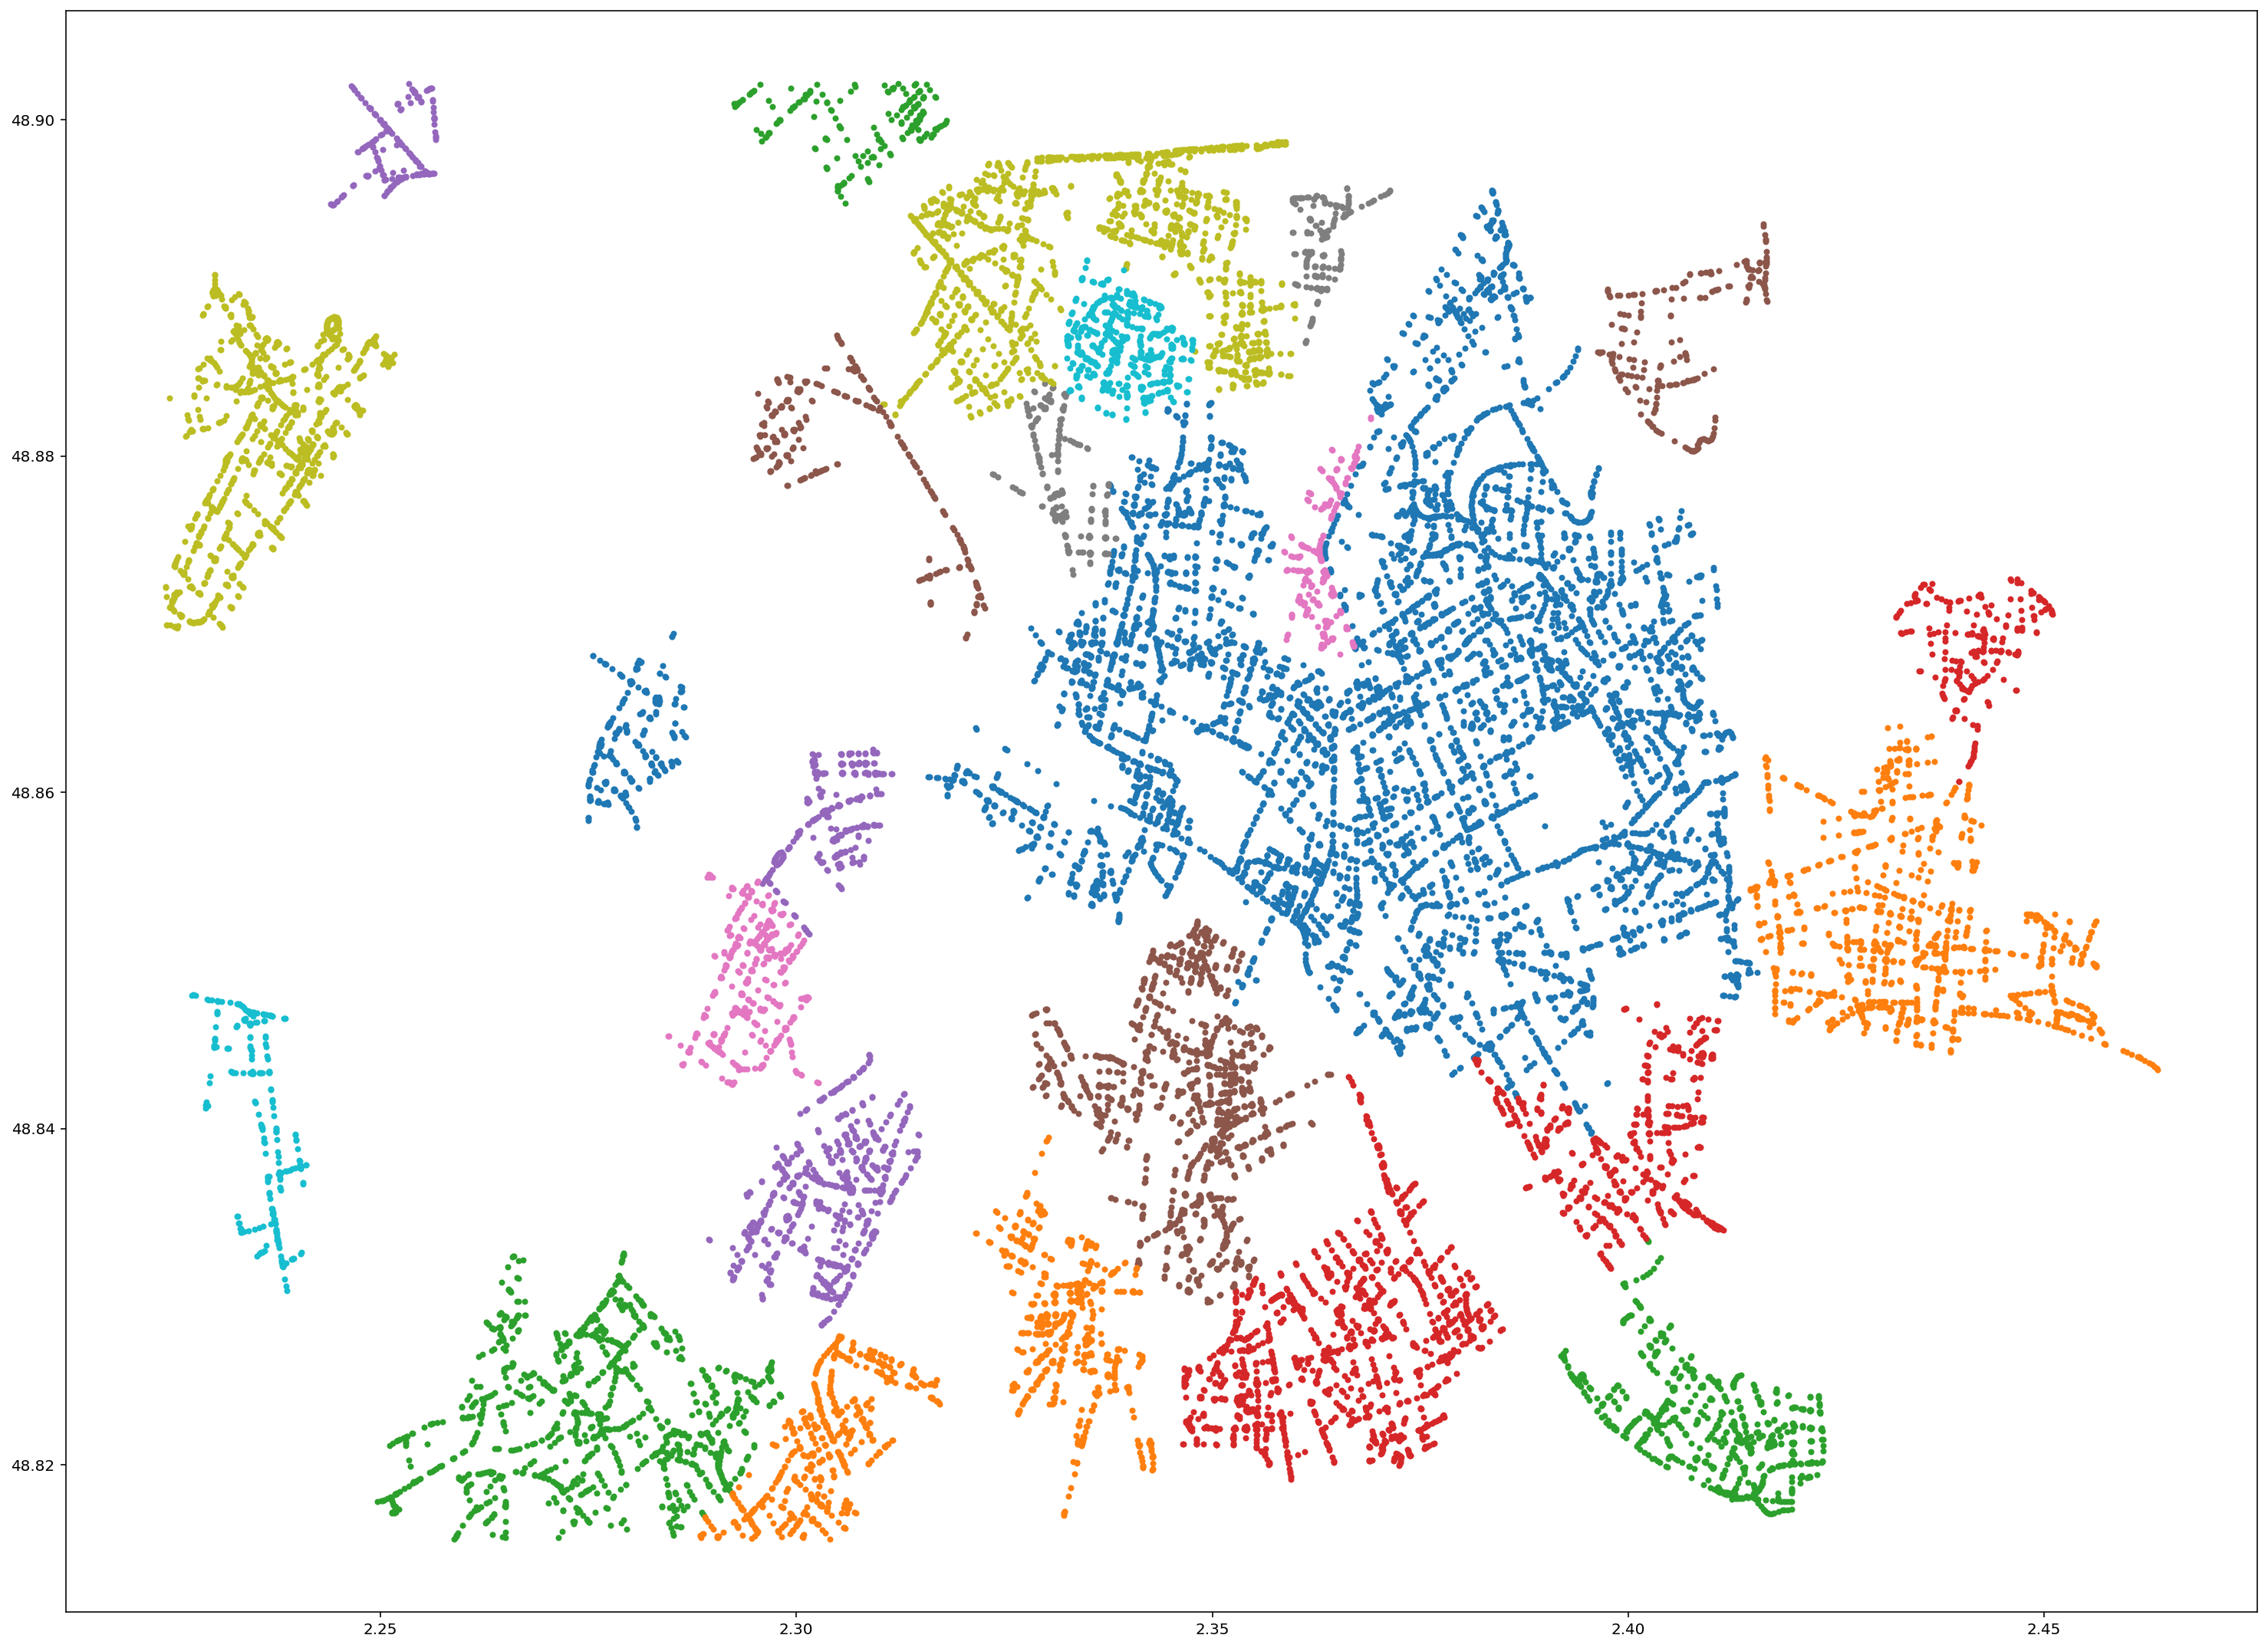

In [20]:
plt.figure(figsize=[4*6.4,4*4.8])
for i in range(len(clusters)):
    plt.plot(clusters[i].vs['x'],clusters[i].vs['y'],'.')
%config InlineBackend.figure_format = 'retina'

In [21]:
#make function to find detour factor of a graph
#sum (i=/=j) of ratios of geodesic distance divided by euclidean distance. then divide by N(N-1)

In [24]:
#sayat's implementation of L2S Algorithm
G_1 = clusters[cluster_indices[0]].copy()
closest_list=[]
for i in range(1,len(clusters)):
    closest_pair = {'i': 0, 'j': 0, 'dist': np.inf}
    for a in list(G_1.vs()):
        for b in list(clusters[cluster_indices[i]].vs()):
            dist_nodes = dist(a,b)
            if dist_nodes < closest_pair['dist']:
                closest_pair['i'] = a['id']
                closest_pair['j'] = b['id']
                closest_pair['dist'] = dist_nodes
    closest_list.append([closest_pair['i'],closest_pair['j']])

In [25]:
closest_list

[[1675158635, 260556892],
 [432808260, 15859492],
 [247188122, 5526475245],
 [1785991641, 27196040],
 [249685109, 125747],
 [2705514268, 176762224],
 [3537303750, 1088436955],
 [2705514268, 164102984],
 [1284603860, 329416063],
 [919598167, 36600344],
 [25670554, 674873020],
 [94206073, 94227589],
 [1785991641, 470173],
 [919598167, 470142],
 [1785991641, 25198716],
 [1785991641, 34909009],
 [1785991641, 34816179],
 [3157145359, 17809150],
 [1785991641, 139192420],
 [94117696, 320901152],
 [567367887, 252253645],
 [1233136932, 1233137081],
 [1785991641, 582138559],
 [201988034, 644102],
 [1233136932, 271430772]]

In [26]:
#sayat closeness centrality calculator
def closeness(graph,i):
    closeness_values = graph.closeness(weights='weight')
    sorted_closeness = sorted(closeness_values,reverse=True)
    index = closeness_values.index(sorted_closeness[i])
    return graph.vs(index)['id']

In [28]:
#more sayat code + additions
G_only_cl_5 = clusters[cluster_indices[0]].copy()
for i in range(1,len(clusters)):
    #closest nodes
    sh_pt = g_biggest.get_all_shortest_paths(id_dict.get(closest_list[i-1][0]) ,id_dict.get(closest_list[i-1][1]) ,weights='weight')[0]
    
    #highest closeness centrality
    #sh_pt1 = g_biggest.get_all_shortest_paths(id_dict.get(closeness(G_only_cl_5,0)[0]) ,id_dict.get(closeness(clusters[cluster_indices[i]],0)[0]) ,weights='weight')[0]
    
    #random nodes
    #sh_pt2 = g_biggest.get_all_shortest_paths(id_dict.get(np.random.choice(G_only_cl_5.vs())["id"]),id_dict.get(np.random.choice(clusters[cluster_indices[i]].vs())["id"]),weights='weight')[0]

    nw = np.unique(G_only_cl_5.vs()['id'] + clusters[cluster_indices[i]].vs()['id']
                  +  g_biggest.vs(sh_pt)['id']
                   #+   g_biggest.vs(sh_pt1)['id']
                   #+   g_biggest.vs(sh_pt2)['id']
                  )
    G_only_cl_5 = g_biggest.subgraph([id_dict.get(key) for key in nw])
    print(i,G_only_cl_5.vcount(),G_only_cl_5.ecount())

1 9740 10389
2 11469 12241
3 12997 13879
4 14543 15480
5 15815 16819
6 17236 18320
7 18109 19269
8 18826 20040
9 19480 20742
10 20260 21576
11 20993 22351
12 21587 22972
13 22116 23530
14 22389 23829
15 22701 24169
16 23015 24493
17 23366 24857
18 23645 25150
19 24139 25648
20 24392 25908
21 24708 26245
22 24939 26484
23 25339 26889
24 25566 27130
25 25866 27450


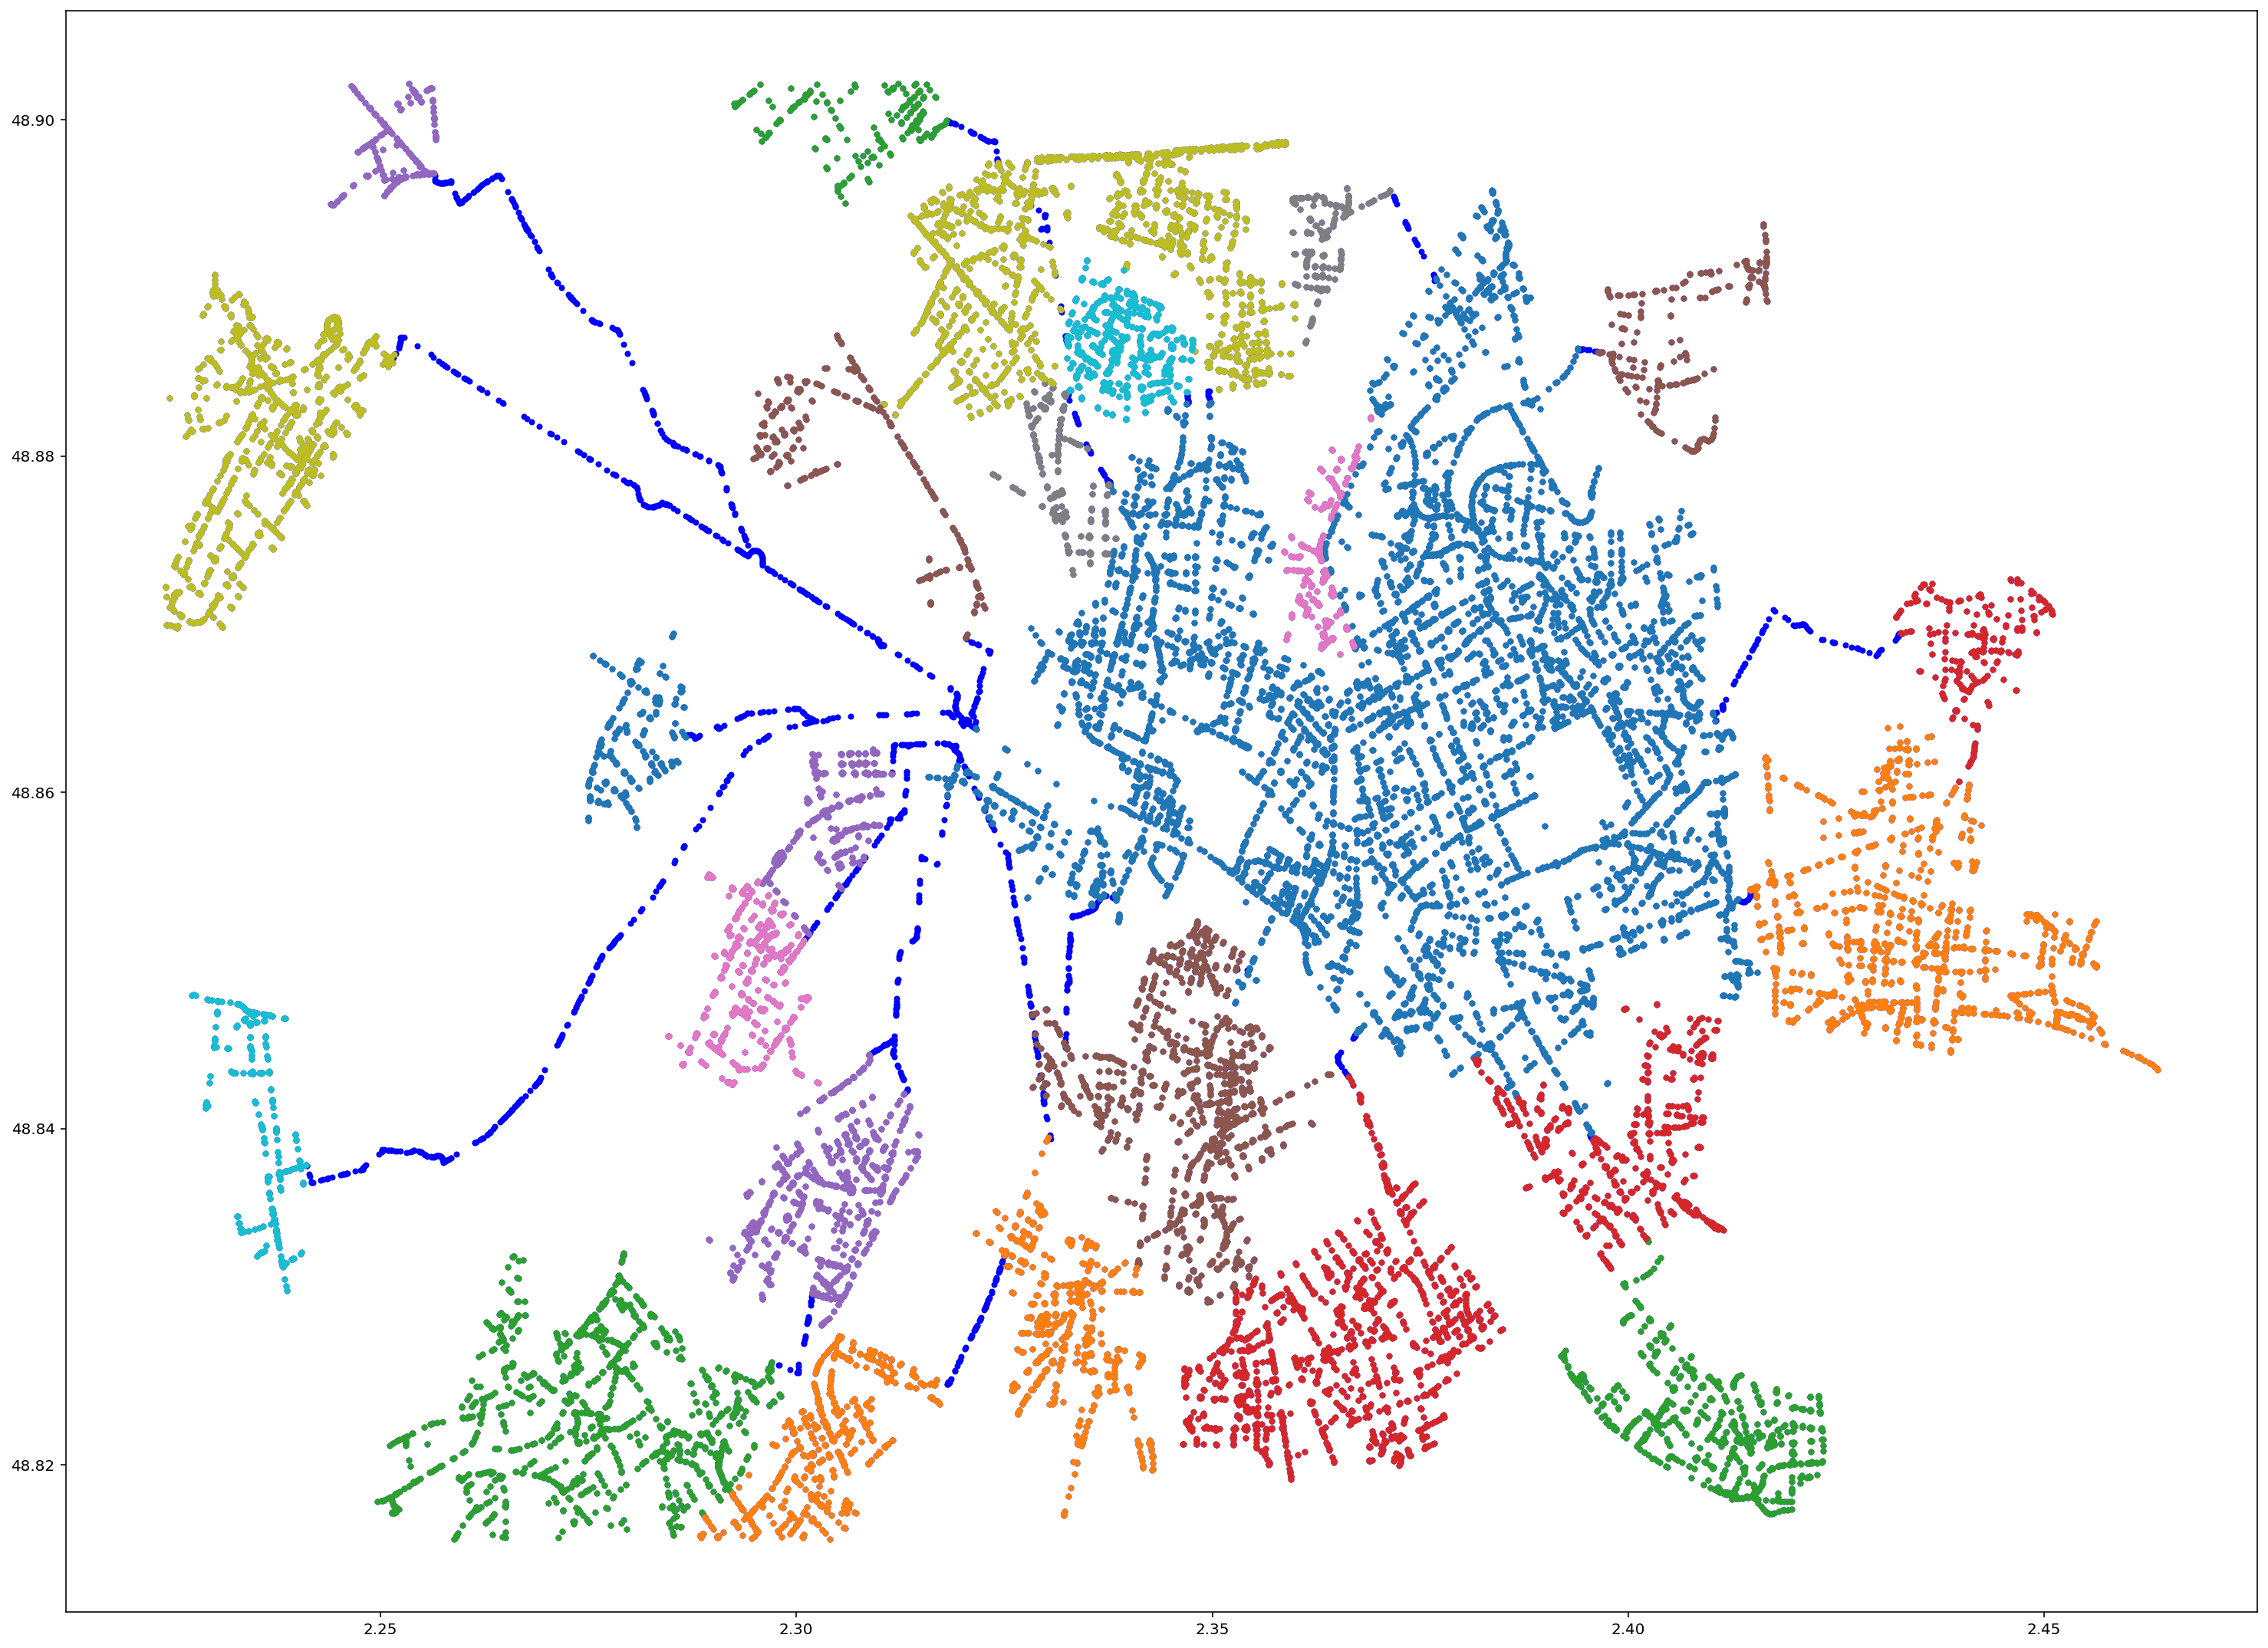

In [29]:
plt.figure(figsize=[4*6.4,4*4.8])
plt.plot(G_only_cl_5.vs['x'],G_only_cl_5.vs['y'],'.',color='blue')
for i in range(len(clusters)):
    plt.plot(clusters[i].vs['x'],clusters[i].vs['y'],'.')
%config InlineBackend.figure_format = 'retina'

In [30]:
# think of an algorithm for "human-like" connections

In [41]:
def detour (graph):
    v_x= list(graph.vs()['x'])
    v_y= list(graph.vs()['y'])
    v_x_y = list(zip(v_x, v_y))
    d_g = np.array(graph.shortest_paths_dijkstra(source=list(range(len(v_x_y))),target=list(range(len(v_x_y))),weights='weight')).flatten()
    d_e = distance.cdist(v_x_y ,v_x_y ).flatten()
    dist_g=d_g[d_e>0.]
    dist_e=d_e[d_e>0.]
    return(np.mean(np.divide(dist_g,dist_e)))

In [35]:
all_clusters_nodes = []
for i in range(len(clusters)):
    all_clusters_nodes += clusters[cluster_indices[i]].vs()['id']
    
candidate_ids = [i for i in g_biggest.vs()['id'] if i not in all_clusters_nodes]
candidates = g_biggest.subgraph([id_dict.get(key) for key in candidate_ids])

In [ ]:
#Sayat's code to generate the plots; need to update variable names and numbers
#candidates is (g_biggest - the clusters)



#rho_5 = []
comp_agg=[]
prop_agg=[]
length_agg=[]
edge_density_agg=[]
edge_density_gc_agg=[]
detour_fact_agg=[]
for j in range(1):   #can change to however many repitions i want
    Sh_pt1 = []
    length=[]
    comp=[]
    prob=[]
    edge_density=[]
    edge_density_gc=[]
    detour_1=[]
    for i in range(70):
        Sh_pt1 = Sh_pt1+(g_biggest.get_all_shortest_paths((np.random.choice([id_dict.get(key) for key in clusters[np.random.choice(num_clusters)].vs()['id']])),np.random.choice([id_dict.get(key) for key in clusters[np.random.choice(num_clusters)].vs()['id']]),weights='weight')[0])
        
        nw = np.unique(all_clusters_nodes
                       + g_biggest.vs(Sh_pt1)['id']

                   #+ g_biggest.vs(Sh_pt2)['id']
                    #  + g_biggest.vs(Sh_pt3)['id']
                     #   + g_biggest.vs(Sh_pt4)['id']
                )
        G_r  = g_biggest.subgraph([id_dict.get(key) for key in nw])
        edge_density.append(G_r.ecount()/G_r.vcount())
        comp.append(len(G_r.components()))
        prob.append(len(Sh_pt1)/len(candidate_ids))
        clengths = []
        for k in range(len(list(G_r.components()))):
            clengths.append(len(list(G_r.components())[k]))
        gc = clengths.index(max(clengths))
        G_gc = G_r.subgraph((list(G_r.components())[gc]))
        length.append(np.sum(G_gc.es()['weight']))
        edge_density_gc.append(G_gc.ecount()/G_gc.vcount())
        detour_1.append(detour(G_gc))

    print(j)
    comp_agg.append(comp)
    detour_fact_agg.append(detour_1)
    prop_agg.append(prob)
    edge_density_gc_agg.append(edge_density_gc)
    edge_density_agg.append(edge_density)
    length_agg.append(length)
    print(i,G_r_1.vcount(),G_r_1.ecount())

In [3]:
p = np.mean(prop_agg, axis = 0)
c = np.mean(comp_agg, axis = 0)
c_e = np.std(comp_agg, axis = 0)

NameError: name 'np' is not defined

In [ ]:
e = np.mean(edge_density_agg,axis=0)/3
e_e = np.std(edge_density_agg,axis=0)/3

In [ ]:
l = np.mean(length_agg,axis=0)
l_e = np.std(length_agg,axis=0)

In [ ]:
cl = np.mean(c_agg_99,axis=0)
cl_e = np.std(c_agg_99,axis=0)

NameError: name 'p' is not defined

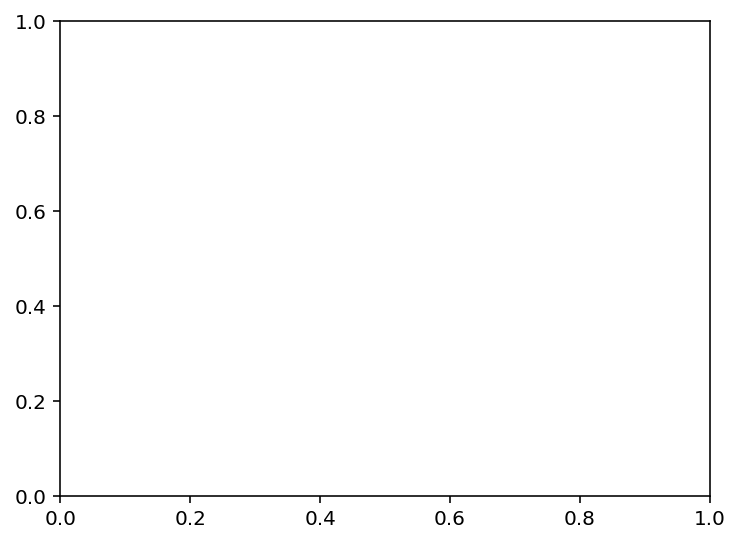

In [34]:
plt.figure(figsize=[2*6.4,2*4.8])

plt.subplot(221)
plt.errorbar(p,c,yerr=c_e,color='black',fmt='o')
plt.xlabel(r'$p$',fontsize=15)
plt.ylabel('no. of components',fontsize=15)


plt.subplot(222)
plt.errorbar(p,e,yerr=e_e,color='black',fmt='o')
plt.xlabel(r'$p$',fontsize=15)
plt.ylabel('edge density',fontsize=15)

In [33]:
#### this is a way to sort nodes according to their betweenness centrality
df1_grw_st= pd.DataFrame(data=G_grw_st.betweenness(weights='weight'),columns={'BC'})
df1_grw_st['x'] = (((G_grw_st.vs())['x']))
df1_grw_st['y'] = (((G_grw_st.vs())['y']))
df1_grw_st['id'] = (((G_grw_st.vs())['id']))
df1_grw_st['no'] = np.arange(0,len(df1_grw_st['x'].tolist())).tolist()
df2_grw_st = df1_grw_st.sort_values('BC',ascending=False)[0:int(len(df1_grw_st['x'])/10)]

#######making histograms
def bins_counts(array,a,b,c):
    count, bins = np.histogram(array, bins=np.logspace(a,b,c),density=1)
    t =[]
    for i in range(len(count)):
        t.append((bins[i + 1] + bins[i])/float(2))
    return t,count

########Plotting clusters with different colors
plt.figure(figsize=[4*6.4, 4*4.8])
plt.plot(G_grw_st.vs()['x'],G_grw_st.vs()['y'],'.',color='black')



color=iter(cm.gist_rainbow(np.linspace(0,1,len(clusters))))
for i in range(len(clusters)):
    c=next(color)
    plt.plot(clusters[i].vs['x'],clusters[i].vs['y'],'.',color=c)
#plt.plot(G_grw_st_cl.vs()['x'],G_grw_st_cl.vs()['y'],'.')
plt.axis('off')

NameError: name 'G_grw_st' is not defined